# Exploratory Data Analysis on the World Happiness Report

The [World Happiness Report](https://worldhappiness.report/) is a landmark survey of the state of global happiness which ranks countries based on responses from citizen self-evaluations and ratings of their own lives and how happy they perceive themselves to be. The report was first launched in 2012 and primarily uses data from the [Gallup World Poll](https://www.gallup.com/178667/gallup-world-poll-work.aspx) to rank countries by their happiness score. The happiness score is calculated from citizens responses to the Cantril Ladder question, which asks them to think about the best possible life for themselves on a scale of 1 (the worst) to 10 (the best) and to score their current lives on that scale.

In this project, we will be analyzing data from the 2019 and 2020 World Happiness Reports to gain insights on the state of happiness within the world in the year before the COVID-19 pandemic began and in the first year of the pandemic. The dataset we will be using can be downloaded from [Kaggle](https://www.kaggle.com/datasets/mathurinache/world-happiness-report), and contains multiple CSV files (one for each years' report, starting with the 2015 report). The files include information on the countries surveyed, their happiness scores, and estimates based on variables that may contribute to how life evaluations are higher in each country than they are in Dystopia, a hypothetical country with the world’s least-happy people.

We will be cleaning up the dataset files before moving onto performing exploratory data analysis and creating visualizations from the results to have a better understanding of the data. To do so, we will utilize tools from several Python libraries, such as NumPy, Pandas, Matplotlib, and Seaborn, and techniques we learned from the [Data Analysis with Python: Zero to Pandas](http://zerotopandas.com/) course by Jovian.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

To download the dataset from Kaggle, we will be using [opendatasets](https://github.com/JovianHQ/opendatasets#opendatasets), a Python helper library used for downloading datasets from online sources. A Kaggle account will be needed to download the dataset directly.

We will start by installing the library into the notebook, then we will download the dataset. 

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

Set the dataset URL into the variable `dataset_url` and use the helper function `od.download` to retrieve the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/mathurinache/world-happiness-report' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amandajchen
Your Kaggle Key: ········


100%|██████████| 67.4k/67.4k [00:00<00:00, 38.7MB/s]

The dataset has been downloaded and extracted.

Next, set the dataset to the variable `data_dir` (a directory) and use the function `os.listdir` to extract the CSV files from within the dataset.

In [5]:
data_dir = './world-happiness-report'

In [6]:
import os
os.listdir(data_dir)

['2015.csv',
 '2020.csv',
 '2018.csv',
 '2022.csv',
 '2021.csv',
 '2019.csv',
 '2017.csv',
 '2016.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "world-happiness-eda"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ajchen97/world-happiness-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ajchen97/world-happiness-eda


'https://jovian.com/ajchen97/world-happiness-eda'

## Data Preparation and Cleaning

In this section, we will clean the dataset and make any necessary modifications in preparation for the analysis.

Let’s import the Pandas and NumPy libraries, then create a dataframe from each of the CSV files we will need, using the `read_csv` method. Name the dataframe(s) with `_raw_df` to indicate that the data has not be modified or processed in any way.

**Note: include the dataset name when reading the file (i.e. `dataset/dataset-file.csv`)*

In [7]:
import pandas as pd
import numpy as np

In [8]:
wh2019_raw_df = pd.read_csv('world-happiness-report/2019.csv')
wh2020_raw_df = pd.read_csv('world-happiness-report/2020.csv')

In [9]:
wh2019_raw_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


The 2019 dataframe contains 156 rows and 9 columns.

In [10]:
wh2020_raw_df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


The 2020 dataframe contains 153 rows and 20 columns.

Let's take a look at some basic information about the dataframes, using the `info` method.

In [11]:
wh2019_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [12]:
wh2020_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

Notice the `wh2020_raw_df` dataset has less rows and more columns than the `wh2019_raw_df` dataset has. We will want to remove the extra columns in the 2020 dataframe to match the columns in the 2019 dataframe, which we will do later.

First, let's check if there are any duplicate rows or empty/missing (NaN) values present in either of the datasets.

To check for duplicate rows, use the `duplicated` method followed by the `sum` function on the dataframe. If there are duplicates, any rows that are duplicates will be set as `True` and any distinct rows set as `False`, then the total will be calculated (`True` is considered 1 and `False` is considered 0 in a calculation). This will return the number of duplicates, if any.

In [13]:
wh2019_raw_df.duplicated().sum()

0

In [14]:
wh2020_raw_df.duplicated().sum()

0

To check for missing data, use the `isna` method followed by the `sum` function on the dataframe. This will return the number of NaN values in each column, if any.

In [15]:
wh2019_raw_df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [16]:
wh2020_raw_df.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

There are no duplicates or missing data in either of the dataframes.

Before we move forward and make any modifications, we will want to create a copy of each dataset into a new dataframe so that, if needed, we can make changes to them without affecting the original datasets. 

Use the `copy` method to create a copy of the original dataset into a new dataframe.

In [17]:
wh2019_df = wh2019_raw_df.copy()
wh2020_df = wh2020_raw_df.copy()

As we noticed earlier, the 2020 dataset has less rows and more columns than the 2019 dataset. The rows represent the number of countries surveyed, so we will not change those in the datasets; however, we will need to modify the columns in the datasets.

There are 8 columns that match in both datasets:
- Country or region
- (Happiness) Score	
- GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption

The 2019 dataset (`wh_2019_df`) has the column `'Overall rank'` that does not appear in the 2020 dataset. We could remove it, but it might helpful to see the ranking of the countries, so we will keep it. Otherwise, the columns are the same and there is no need to modify it.

The 2020 dataset (`wh2020_df`) will need to be modified in a few ways: 
1. Add a new column
2. Downsize multiple columns
3. Rename columns

When making modifications, set it equal to the dataframe itself so that the dataframe is directly updated.

**Add a column:** Use the `sort_values` method to sort the `wh2020_df` dataframe by the happiness score (`'Ladder score'` column) in descending order. We will then be able to add another column for the overall rank, which is the rank of each country by happiness score, to match the overall rank column in `wh2019_df`.

In [18]:
wh2020_df = wh2020_df.sort_values(by='Ladder score', ascending=False)
wh2020_df['Overall rank'] = pd.Series(np.arange(1, 154))

**Downsize columns:** We will select all the columns from `wh2020_df` according to the list of columns in common between both datasets, so that the dataframe contains only the columns we need.

In [19]:
wh2020_df = wh2020_df[['Overall rank', 'Country name', 'Ladder score', 'Explained by: Log GDP per capita', 
                       'Social support', 'Explained by: Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
                       'Perceptions of corruption']]

**Rename columns:** Use the `rename` method to rename some of the columns, so that we have consistency between the datasets. 

In [20]:
wh2020_df = wh2020_df.rename(columns={'Country name':'Country or region', 'Ladder score':'Score', 
                          'Explained by: Log GDP per capita':'GDP per capita', 
                          'Explained by: Healthy life expectancy':'Healthy life expectancy'})
wh2020_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.8087,1.285190,0.954330,0.961271,0.949172,-0.059482,0.195445
1,2,Denmark,7.6456,1.326949,0.955991,0.979333,0.951444,0.066202,0.168489
2,3,Switzerland,7.5599,1.390774,0.942847,1.040533,0.921337,0.105911,0.303728
3,4,Iceland,7.5045,1.326502,0.974670,1.000843,0.948892,0.246944,0.711710
4,5,Norway,7.4880,1.424207,0.952487,1.008072,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.4759,0.041072,0.319460,0.000000,0.640881,0.082410,0.891807
149,150,Rwanda,3.3123,0.343243,0.540835,0.572383,0.900589,0.055484,0.183541
150,151,Zimbabwe,3.2992,0.425564,0.763093,0.375038,0.711458,-0.072064,0.810237
151,152,South Sudan,2.8166,0.289083,0.553707,0.208809,0.451314,0.016519,0.763417


In [339]:
import jovian

In [340]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ajchen97/world-happiness-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ajchen97/world-happiness-eda


'https://jovian.com/ajchen97/world-happiness-eda'

## Exploratory Analysis and Visualization

In this section, we will perform exploratory data analysis on the dataset to better understand the data. We will compute and review the statistics of the dataset and create graphs to visualize the distributions of and relationships between columns.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Correlation Between Columns

We will take a look at the correlations between the happiness score and the variables that may contribute to the score, and visualize it with a heatmap. Use the `corr` method to find the correlations between each column in the datasets.

In [22]:
wh2019_df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [23]:
wh2020_df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.985263,-0.777302,-0.749488,-0.769746,-0.583441,-0.044922,0.394355
Score,-0.985263,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043,-0.418305
GDP per capita,-0.777302,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399,-0.334729
Social support,-0.749488,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780,-0.210530
Healthy life expectancy,-0.769746,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852,-0.353841
Freedom to make life choices,-0.583441,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721,-0.420145
Generosity,-0.044922,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000,-0.278480
Perceptions of corruption,0.394355,-0.418305,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,1.000000


Use `plt.figure` to specify the size of the figure and `plt.subplot` to draw multiple plots in one figure, then use `sns.heatmap` to visualize the correlation between each column. We also use `sns.diverging_palette` to create a customized colormap (`cmap`) with two colors to differentiate positive and negative correlation.

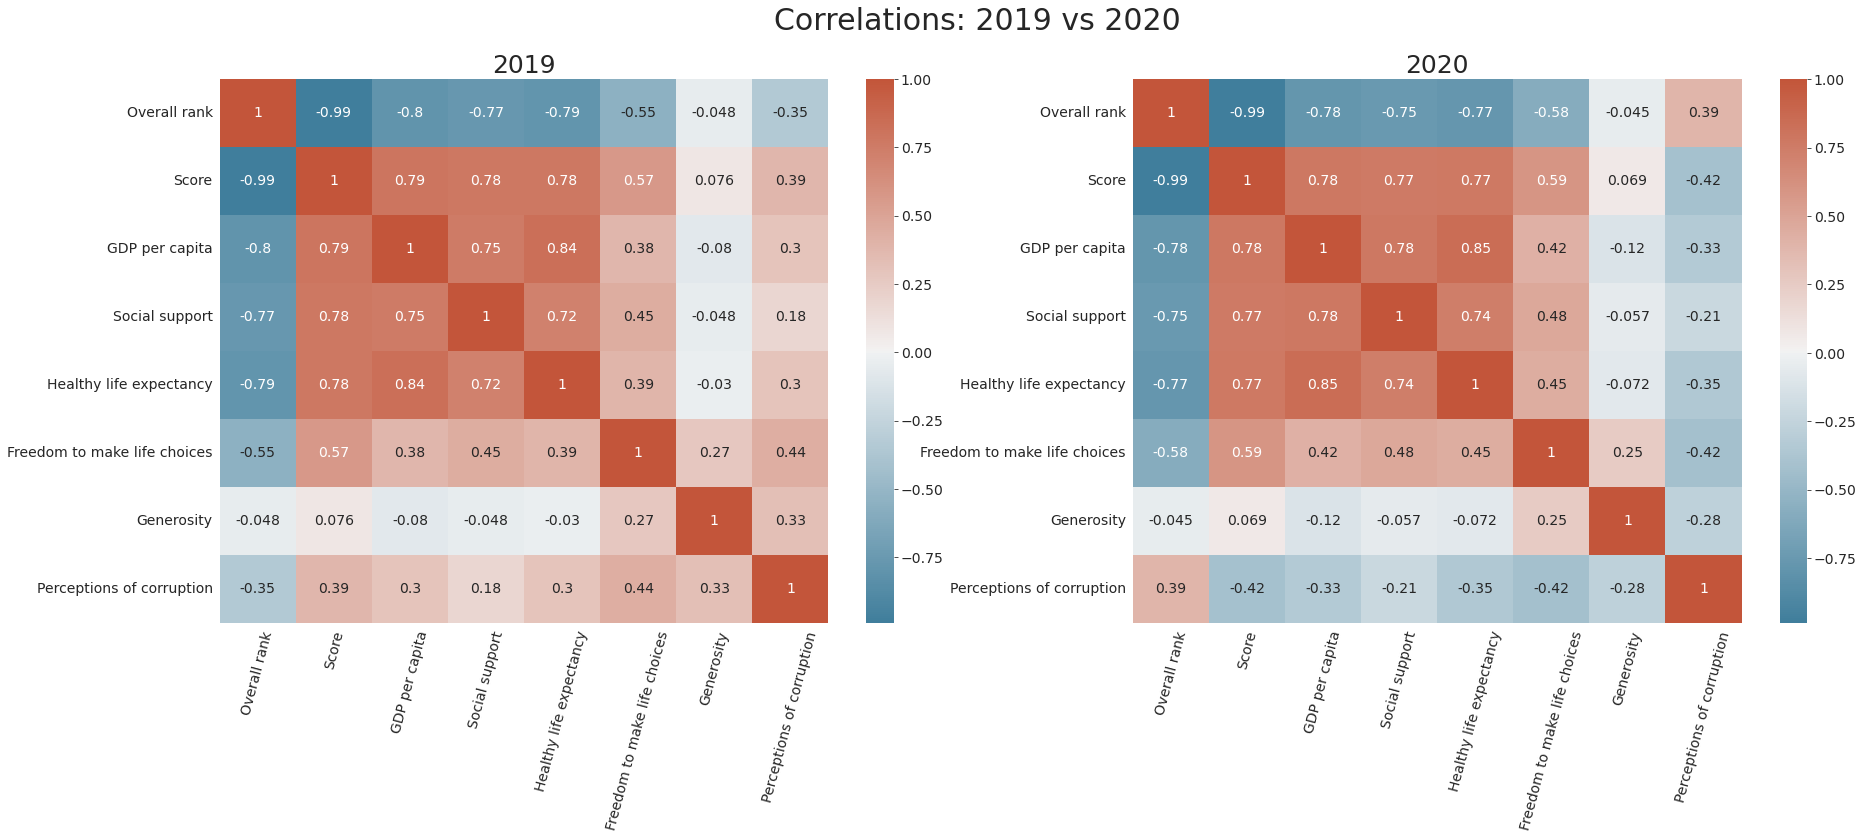

In [24]:
plt.figure(figsize=(30, 10))
plt.suptitle("Correlations: 2019 vs 2020           ", fontsize=30)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.subplot(1, 2, 1)
plt.title("2019", fontsize=25)
plt.xticks(rotation=75)
sns.heatmap(wh2019_df.corr(), annot=True, cmap=cmap);

plt.subplot(1, 2, 2)
plt.title("2020", fontsize=25)
plt.xticks(rotation=75)
sns.heatmap(wh2020_df.corr(), annot=True, cmap=cmap);

The heatmap shows the correlation between each column. They each have a perfect (1:1) correlation to themselves.

Red indicates positive correlation; the darker red means that it is more likely the column has a positive effect on the other column (one goes up, the other goes up) and the lighter red means that it is less likely the column has an affect on the other column.

Blue indicates negative correlation; the darker blue means that it is more likely the column has a negative effect on the other column (one goes up, the other goes down) and the lighter blue means that it is less likely the column has an affect on the other column.

Looking at the visual above, it looks like most correlations from 2019 and 2020 have fairly similar numbers, except for `Perceptions of corruption`, which seems to have gone from a positive correlation with every other column to a negative correlation with every other column. However, the numbers are still very small, which means it is unlikely one column has an affect on another.

#### Happiness Score Distribution

We will graph a histogram to show the distribution of the happiness score for all countries in each dataframe.

Let's start with looking at the statistics for each dataset; use the `describe` method to view some basic stats about the dataset.

In [25]:
wh2019_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [26]:
wh2020_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,5.47324,0.868771,0.808721,0.692869,0.783360,-0.014568,0.733120
std,44.311398,1.11227,0.372416,0.121453,0.254094,0.117786,0.151809,0.175172
min,1.000000,2.56690,0.000000,0.319460,0.000000,0.396573,-0.300907,0.109784
25%,39.000000,4.72410,0.575862,0.737217,0.495443,0.714839,-0.127015,0.683019
50%,77.000000,5.51500,0.918549,0.829204,0.759818,0.799805,-0.033665,0.783122
75%,115.000000,6.22850,1.169229,0.906747,0.867249,0.877709,0.085429,0.849151
max,153.000000,7.80870,1.536676,0.974670,1.137814,0.974998,0.560664,0.935585


Let's note some numbers (rounded to 2 decimals) for the happiness scores to use for the visualization.
- Minimum: 2.85 (2019), 2.57 (2020)
- Maximum: 7.77 (2019), 7.81 (2020)
- Mean: 5.41 (2019), 5.47 (2020)
- Standard deviation: 1.11 (both)

Use `plt.subplot` to draw multiple plots in one figure and specify the figure shape, then use `plt.hist` to graph the histogram. The range (based on the min and max scores) will be from 2 to 9, measuring 0.5 in between. We will draw one histogram for each dataframe, and label the title, x-axis, and y-axis with `plt.title`, `plt.xlabel`, and `plt.ylabel`, accordingly.

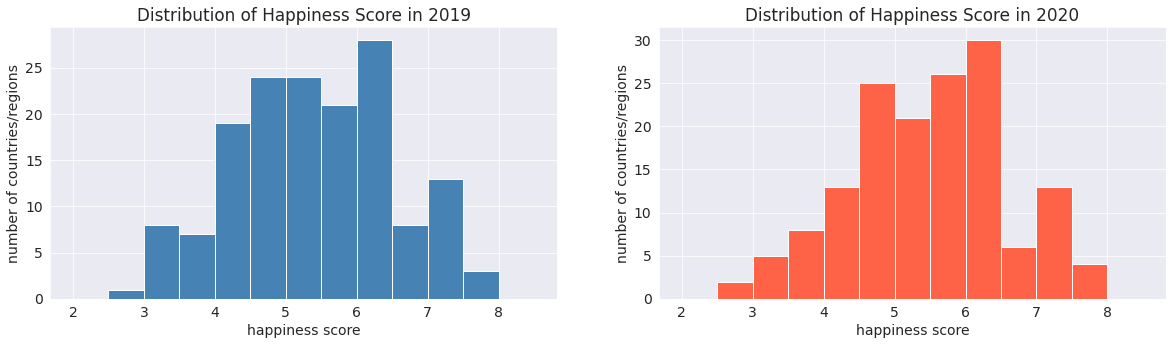

In [27]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of Happiness Score in 2019")
plt.xlabel('happiness score')
plt.ylabel('number of countries/regions')
plt.hist(wh2019_df['Score'], bins=np.arange(2, 9, 0.5), color="steelblue");

plt.subplot(1, 2, 2)
plt.title("Distribution of Happiness Score in 2020")
plt.xlabel('happiness score')
plt.ylabel('number of countries/regions')
plt.hist(wh2020_df['Score'], bins=np.arange(2, 9, 0.5), color="tomato");

We can also stack the histograms to see the difference between distributions for 2019 and 2020 and create a legend to differentiate them. We will need to import `matplotlib.patches` to use the `Patch` method to create an entry for the legend, then use `plt.legend` to create the legend.

In [28]:
import matplotlib.patches as mpatches

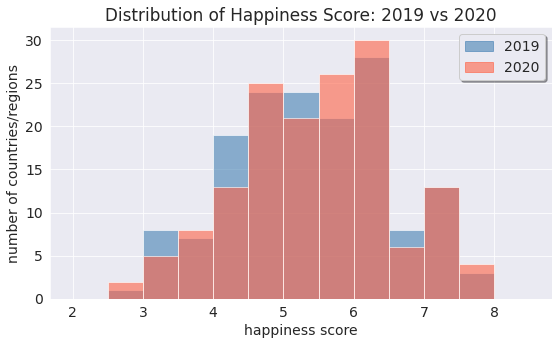

In [29]:
plt.title("Distribution of Happiness Score: 2019 vs 2020")
plt.xlabel('happiness score')
plt.ylabel('number of countries/regions')
plt.hist(wh2019_df['Score'], alpha=0.6, bins=np.arange(2, 9, 0.5), color='steelblue');
plt.hist(wh2020_df['Score'], alpha=0.6, bins=np.arange(2, 9, 0.5), stacked=True, color='tomato');

blue_patch = mpatches.Patch(color='steelblue', alpha=0.6, label='2019')
red_patch = mpatches.Patch(color='tomato', alpha=0.6, label='2020')
plt.legend(handles=[blue_patch, red_patch], shadow=True);

Based on the graph, we can see that the number of countries with happiness scores between 5.5 and 6.5 increased from 2019 to 2020 and the distribution is slightly skewed to the left for 2020.

#### Happiness Score Statistics

Let's graph a bar chart to compare the mean, min, and max of the happiness scores from each dataset.

Use the `describe` method to view the stats for the happiness score.

In [30]:
wh2019_df['Score'].describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

In [31]:
wh2020_df['Score'].describe()

count    153.00000
mean       5.47324
std        1.11227
min        2.56690
25%        4.72410
50%        5.51500
75%        6.22850
max        7.80870
Name: Score, dtype: float64

We will create variables for the mean, min, and max scores, using the `mean`, `min`, and `max` methods, and round it to the 3rd decimal with the `round` function.

In [32]:
mean_2019 = round(wh2019_df['Score'].mean(), 3)
mean_2020 = round(wh2020_df['Score'].mean(), 3)

min_2019 = round(wh2019_df['Score'].min(), 3)
min_2020 = round(wh2020_df['Score'].min(), 3)

max_2019 = round(wh2019_df['Score'].max(), 3)
max_2020 = round(wh2020_df['Score'].max(), 3)

Create a dictionary with the variables created then insert the data into a new DataFrame that we will use for the graph.

In [33]:
stats_year = {'mean': [mean_2019, mean_2020], 'min': [min_2019, min_2020], 'max': [max_2019, max_2020], 'year': [2019, 2020]}
stats_year_df = pd.DataFrame(stats_year)
stats_year_df

,mean,min,max,year
0,5.407,2.853,7.769,2019
1,5.473,2.567,7.809,2020


Use `plt.bar` to draw a bar graph for each statistic, with the year on the x-axis and happiness score on the y-axis. We will use the variable `bar_width` to split the bars and format it so that the statistics are next to each other instead of stacked.

Label each bar with the statistic and value corresponding to it with `plt.bar_label`. 

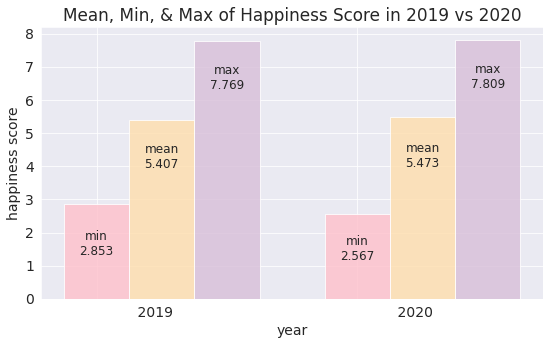

In [34]:
bar_width = 0.25

plt.title('Mean, Min, & Max of Happiness Score in 2019 vs 2020')
plt.xlabel('year')
plt.ylabel('happiness score')
plt.xticks(stats_year_df['year'], ('         2019', '         2020'), ha='left')
max_bar = plt.bar(stats_year_df['year'] + bar_width + bar_width, stats_year_df['max'], bar_width, align='center', alpha=0.8, color="thistle");
mean_bar = plt.bar(stats_year_df['year'] + bar_width, stats_year_df['mean'], bar_width, align='center', alpha=0.8, color="navajowhite");
min_bar = plt.bar(stats_year_df['year'], stats_year_df['min'], bar_width, align='center', alpha=0.8, color="pink");

plt.bar_label(max_bar, ['max', 'max'], label_type='center', fontsize=12, padding=100);
plt.bar_label(max_bar, stats_year_df['max'], label_type='center', fontsize=12, padding=85);
plt.bar_label(mean_bar, ['mean', 'mean'], label_type='center', fontsize=12, padding=60);
plt.bar_label(mean_bar, stats_year_df['mean'], label_type='center', fontsize=12, padding=45);
plt.bar_label(min_bar, ['min', 'min'], label_type='center', fontsize=12, padding=15);
plt.bar_label(min_bar, stats_year_df['min'], label_type='center', fontsize=12, padding=0);

The graph helps us visualize the changes from 2019 to 2020. We can see that the minimum happiness score slightly decreased, while the mean and max slightly increased.

#### Happiness Score vs Social Parameters

Let's look at how social parameters, such as `social support`, `generosity`, `perceptions of corruption`, and `freedom to make life choices`, may affect the happiness score.

We will graph a total of four scatter plots in one figure. There will be one plot for each parameter, with both 2019 and 2020 combined in each one.

Use `plt.subplot` for multiple plots, then use `plt.scatter` to draw a scatter plot. The x-axis for each graph will be `Score` and the y-axis will be one of the four social parameters. We will then include a legend and label the entire figure with `plt.suptitle`, along with a title for each individual graph. 

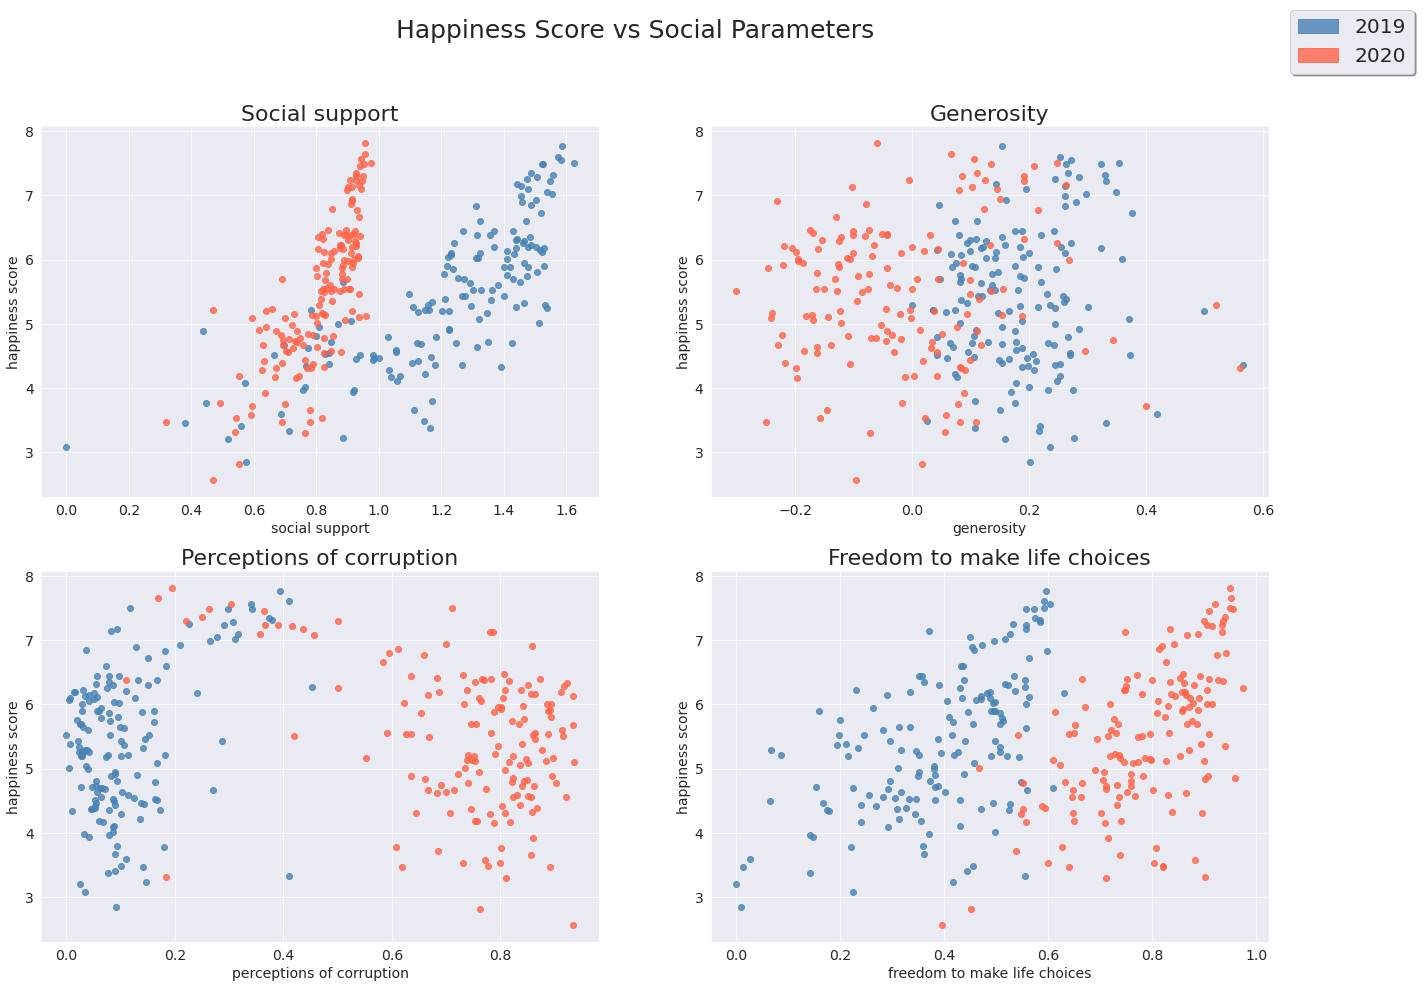

In [35]:
plt.figure(figsize=(22, 15))
plt.suptitle("Happiness Score vs Social Parameters", fontsize=25);
blue_patch = mpatches.Patch(color='steelblue', alpha=0.8, label='2019')
red_patch = mpatches.Patch(color='tomato', alpha=0.8, label='2020')
plt.figlegend(handles=[blue_patch, red_patch], fontsize='x-large', shadow=True);

plt.subplot(2, 2, 1)
plt.title("Social support", fontsize=22)
plt.xlabel('social support')
plt.ylabel('happiness score')
plt.scatter(wh2019_df['Social support'], wh2019_df['Score'], alpha=0.8, color='steelblue');
plt.scatter(wh2020_df['Social support'], wh2020_df['Score'], alpha=0.8, color='tomato');

plt.subplot(2, 2, 2)
plt.title("Generosity", fontsize=22)
plt.xlabel('generosity')
plt.ylabel('happiness score')
plt.scatter(wh2019_df['Generosity'], wh2019_df['Score'], alpha=0.8, color='steelblue');
plt.scatter(wh2020_df['Generosity'], wh2020_df['Score'], alpha=0.8, color='tomato');

plt.subplot(2, 2, 3)
plt.title("Perceptions of corruption", fontsize=22)
plt.xlabel('perceptions of corruption')
plt.ylabel('happiness score')
plt.scatter(wh2019_df['Perceptions of corruption'], wh2019_df['Score'], alpha=0.8, color='steelblue');
plt.scatter(wh2020_df['Perceptions of corruption'], wh2020_df['Score'], alpha=0.8, color='tomato');

plt.subplot(2, 2, 4)
plt.title("Freedom to make life choices", fontsize=22)
plt.xlabel('freedom to make life choices')
plt.ylabel('happiness score')
plt.scatter(wh2019_df['Freedom to make life choices'], wh2019_df['Score'], alpha=0.8, color='steelblue');
plt.scatter(wh2020_df['Freedom to make life choices'], wh2020_df['Score'], alpha=0.8, color='tomato');

Based on the graphs, we can note the following:
- **Social support:** the social support for countries with a happiness score above 5 decreased from 2019 to 2020; in 2019, the happiness score increased as the social support increased, however in 2020, the happiness score increased even with less social support.
- **Generosity:** the overall shape of the graph for both datasets is about the same, except the generosity decreased from 2019 to 2020; it is hard to tell how generosity may affect happiness.
- **Perceptions of corruption:** the data in 2019 and 2020 seems to have the opposite results; the perception of corruption in 2019 looks like there isn't a big affect on the happiness score, however some of the countries with the highest happiness scores seem to have a higher perception of corruption; the perception of corruption in 2020 seems to have increased from 2019, however it also does not look like there is a big affect on the happiness score, although the countries with the highest happiness scores seem to have a lower perception of corruption.
- **Freedom to make life choices:** the overall shape of the graph for both datasets is about the same, except the numbers for freedom to make life choices decreased from 2019 to 2020; it looks like as the freedom to make life choices increases, the happiness scores tends to increase.

#### Happiness Score vs Economic & Life Expectancy Parameters

We will do a similar comparison with the happiness score and see how the economic (`GDP per capita`) and life expectancy (`Healthy life expectancy`) parameters may affect the score. We will graph a scatter plot for each parameter, with both datasets in each.

Use `plt.subplot` for multiple plots, then use `plt.scatter` to draw a scatter plot and include a legend and title for the entire figure and each plot.

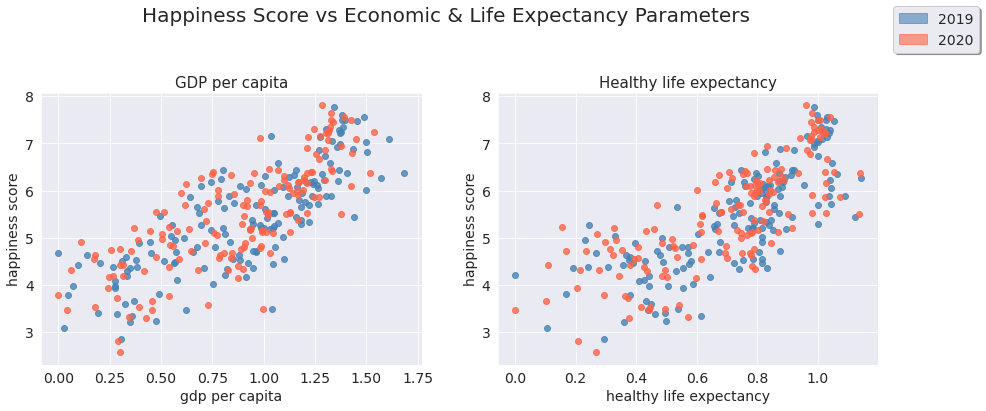

In [36]:
plt.figure(figsize=(15, 5))
plt.suptitle("Happiness Score vs Economic & Life Expectancy Parameters", y=1.12, fontsize=20);
blue_patch = mpatches.Patch(color='steelblue', alpha=0.6, label='2019')
red_patch = mpatches.Patch(color='tomato', alpha=0.6, label='2020')
plt.figlegend(handles=[blue_patch, red_patch], fontsize='medium', shadow=True);

plt.subplot(1, 2, 1)
plt.title("GDP per capita", fontsize=15)
plt.xlabel('gdp per capita')
plt.ylabel('happiness score')
plt.scatter(wh2019_df['GDP per capita'], wh2019_df['Score'], alpha=0.8, color='steelblue');
plt.scatter(wh2020_df['GDP per capita'], wh2020_df['Score'], alpha=0.8, color='tomato');

plt.subplot(1, 2, 2)
plt.title("Healthy life expectancy", fontsize=15)
plt.xlabel('healthy life expectancy')
plt.ylabel('happiness score')
plt.scatter(wh2019_df['Healthy life expectancy'], wh2019_df['Score'], alpha=0.8, color='steelblue');
plt.scatter(wh2020_df['Healthy life expectancy'], wh2020_df['Score'], alpha=0.8, color='tomato');

Based on the graphs, we can note the following:
- **Economic:** the overall shape of the graph is pretty much the same for both datasets; as GDP per capita increases, the happiness score tends to increase as well.
- **Life expectancy:** the overall shape of the graph is also about the same for both datasets; as healthy life expectancy increases, the happiness score tends to increase as well.

Let us save and upload our work to Jovian before continuing

In [136]:
import jovian

In [137]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ajchen97/world-happiness-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ajchen97/world-happiness-eda


'https://jovian.com/ajchen97/world-happiness-eda'

## Asking and Answering Questions

In this section, we will take a look at some more information about the datasets and answer questions about it.

#### Q1: Top & Bottom 10 Ranks
Which countries appeared in the top 10 and bottom 10 ranks in both years?

Use the `head` and `tail` methods to grab the top and bottom 10 ranks from each dataset, then use `copy` to copy it into a new variable. 

In [37]:
top_countries_2019 = wh2019_df.head(10).copy()
top_countries_2020 = wh2020_df.head(10).copy()

bott_countries_2019 = wh2019_df.tail(10).copy()
bott_countries_2020 = wh2020_df.tail(10).copy()

To see which countries appear in the top or bottom 10 in both datasets, we can join the datasets on a matching column. 

Use `merge` to join the two datasets for the top 10 and the two datasets for the bottom 10, and pass the column `Country or region` in the `on` argument.

In [38]:
top_10 = top_countries_2019.merge(top_countries_2020, on='Country or region')
top_10['Country or region']

0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
5    Switzerland
6         Sweden
7    New Zealand
8        Austria
Name: Country or region, dtype: object

In [39]:
bott_10 = bott_countries_2019.merge(bott_countries_2020, on='Country or region')
bott_10['Country or region']

0                    Botswana
1                      Malawi
2                       Yemen
3                      Rwanda
4                    Tanzania
5                 Afghanistan
6    Central African Republic
7                 South Sudan
Name: Country or region, dtype: object

We can see that: 
- Nine out of ten top 10 ranked countries were ranked in the top 10 for both 2019 and 2020.
- Eight out of ten bottom 10 ranked countries were ranked in the bottom 10 for both 2019 and 2020.

#### Q2: Scores Above & Below Mean
How many countries have a happiness score below the mean, and how many countries have a happiness score above the mean?

In [40]:
mean_2019

5.407

In [41]:
mean_2020

5.473

Use the `count` function to figure out how many countries have a score above or below the mean.

In [42]:
wh2019_df['Score'][wh2019_df['Score'] > 5.407].count()

77

In [43]:
wh2019_df['Score'][wh2019_df['Score'] <= 5.407].count()

79

In 2019, there are 77 countries with a happiness score above the mean and 79 countries with a happiness score below the mean.

In [44]:
wh2020_df['Score'][wh2020_df['Score'] > 5.473].count()

80

In [45]:
wh2020_df['Score'][wh2020_df['Score'] <= 5.473].count()

73

In 2020, there are 80 countries with a happiness score above the mean and 73 countries with a happiness score below the mean.

We can visualize this with the `sns.countplot`. First we will create a list based on the scores column that tells if the score is above or below the mean. Then create a new column in the DataFrame called `Relative to Mean` with the list.

Use the `Relative to Mean` column to graph the values.

In [46]:
mean_list_2019 = pd.Series(wh2019_df['Score'])
mean_list_2020 = pd.Series(wh2020_df['Score'])

In [47]:
mean_2019 = mean_list_2019.tolist()
mean_2019_list = []

for x in mean_2019:
    if x > 5.407:
        mean_2019_list.append('above mean')
    else:
        mean_2019_list.append('below mean')

In [48]:
mean_2020 = mean_list_2020.tolist()
mean_2020_list = []

for x in mean_2020:
    if x > 5.473:
        mean_2020_list.append('above mean')
    else:
        mean_2020_list.append('below mean')

In [49]:
wh2019_df['Relative to Mean'] = mean_2019_list
wh2020_df['Relative to Mean'] = mean_2020_list

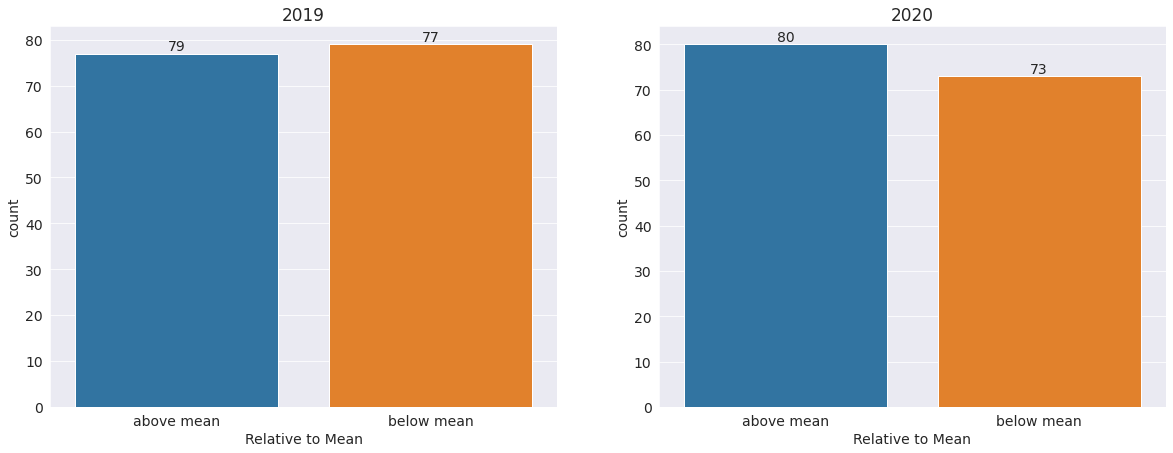

In [50]:
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
plt.title("2019")
mean_bar_2019 = sns.countplot(x=wh2019_df['Relative to Mean']);
plt.subplot(1,2,2)
plt.title("2020")
mean_bar_2020 = sns.countplot(x=wh2020_df['Relative to Mean']);

mean_values_2019 = wh2019_df['Relative to Mean'].value_counts().values
mean_bar_2019.bar_label(container=mean_bar_2019.containers[0], labels=mean_values_2019);
mean_values_2020 = wh2020_df['Relative to Mean'].value_counts().values
mean_bar_2020.bar_label(container=mean_bar_2020.containers[0], labels=mean_values_2020);

In 2019, there are slightly less countries with a score above the mean score, and in 2020, there are slightly more countries with a score above the mean score.

#### Q3: Each Scale Number
How many countries fall under each increment of the happiness score, from 1 to 10?

We will create a new column, `Scale`, in each dataset that represents the increment that a country's happiness score falls under. For example, if a country's happiness score is 5.43 then it will fall under '5' and if the score is 7.21 then it will fall under '7', etc.

First, we will create a list by using a `for loop` to iterate the `Score` column to get the increment the score falls in.

In [51]:
scale_2019 = []

for x in wh2019_df['Score']:
    if x >= 1 and x < 2:
        scale_2019.append(1)
    elif x >= 2 and x < 3:
        scale_2019.append(2)
    elif x >= 3 and x < 4:
        scale_2019.append(3)
    elif x >= 4 and x < 5:
        scale_2019.append(4)
    elif x >= 5 and x < 6:
        scale_2019.append(5)
    elif x >= 6 and x < 7:
        scale_2019.append(6)
    elif x >= 7 and x < 8:
        scale_2019.append(7)
    elif x >= 8 and x < 9:
        scale_2019.append(8)
    elif x >= 9 and x < 10:
        scale_2019.append(9)
    else:
        scale_2019.append(10)

Then create a new column `Scale` in the dataset, using the list we created above as the data.

In [52]:
wh2019_df['Scale'] = scale_2019

Repeat the above steps for the second dataset.

In [53]:
scale_2020 = []

for x in wh2020_df['Score']:
    if x >= 1 and x < 2:
        scale_2020.append(1)
    elif x >= 2 and x < 3:
        scale_2020.append(2)
    elif x >= 3 and x < 4:
        scale_2020.append(3)
    elif x >= 4 and x < 5:
        scale_2020.append(4)
    elif x >= 5 and x < 6:
        scale_2020.append(5)
    elif x >= 6 and x < 7:
        scale_2020.append(6)
    elif x >= 7 and x < 8:
        scale_2020.append(7)
    elif x >= 8 and x < 9:
        scale_2020.append(8)
    elif x >= 9 and x < 10:
        scale_2020.append(9)
    else:
        scale_2020.append(10)

In [54]:
wh2020_df['Scale'] = scale_2020

With the new column, we will use `sns.countplot` to plot a bar chart using the number of observations in each increment. We can also use `bar_label` to label each bar with the values (number of countries in each increment).

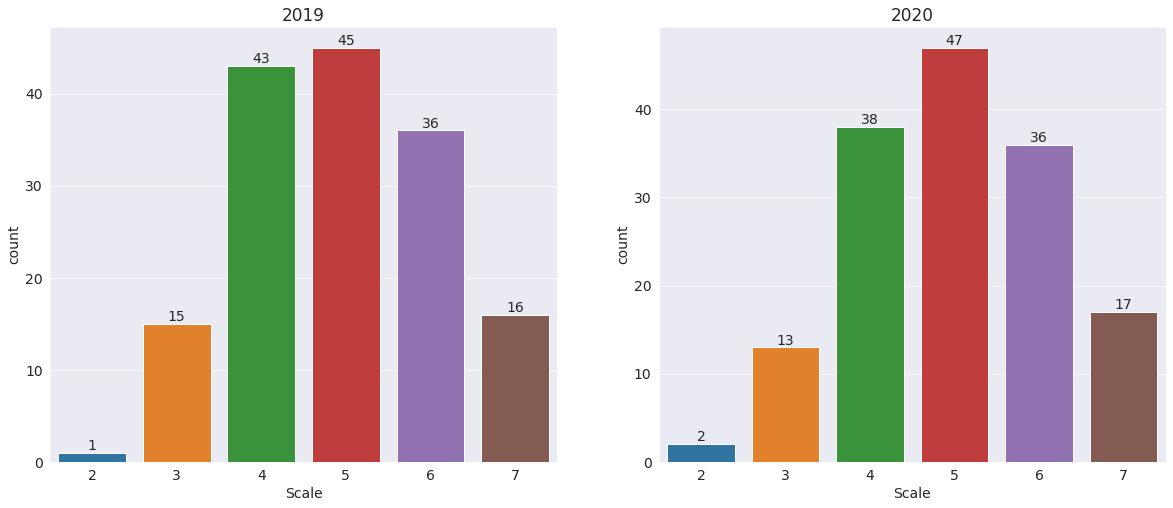

In [79]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title("2019")
scale_bar_2019 = sns.countplot(x=wh2019_df['Scale']);
plt.subplot(1,2,2)
plt.title("2020")
scale_bar_2020 = sns.countplot(x=wh2020_df['Scale']);

scale_values_2019 = wh2019_df['Scale'].value_counts().sort_index().values
scale_bar_2019.bar_label(container=scale_bar_2019.containers[0], labels=scale_values_2019);
scale_values_2020 = wh2020_df['Scale'].value_counts().sort_index().values
scale_bar_2020.bar_label(container=scale_bar_2020.containers[0], labels=scale_values_2020);

From the graphs, we can see that in both years, most countries fall within the '5' scale on the happiness score, with the similar values in each increment between the two years. The exception is the '4' scale, but that may be due to the fact that 2019 has a few more countries included than in 2020. We also see that there are no countries with a happiness score within 1, 8, 9, or 10. 

#### Q4: Parameter Statistics
How did the statistics change from 2019 to 2020 for the variables?

- GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption

We will create variables for the mean, min, and max of each column, using the `mean`, `min`, and `max` methods, and round it to the 3rd decimal with the `round` function.

In [83]:
gdp_mean_2019 = round(wh2019_df['GDP per capita'].mean(), 3)
gdp_mean_2020 = round(wh2020_df['GDP per capita'].mean(), 3)

gdp_min_2019 = round(wh2019_df['GDP per capita'].min(), 3)
gdp_min_2020 = round(wh2020_df['GDP per capita'].min(), 3)

gdp_max_2019 = round(wh2019_df['GDP per capita'].max(), 3)
gdp_max_2020 = round(wh2020_df['GDP per capita'].max(), 3)

In [84]:
soc_mean_2019 = round(wh2019_df['Social support'].mean(), 3)
soc_mean_2020 = round(wh2020_df['Social support'].mean(), 3)

soc_min_2019 = round(wh2019_df['Social support'].min(), 3)
soc_min_2020 = round(wh2020_df['Social support'].min(), 3)

soc_max_2019 = round(wh2019_df['Social support'].max(), 3)
soc_max_2020 = round(wh2020_df['Social support'].max(), 3)

In [85]:
life_mean_2019 = round(wh2019_df['Healthy life expectancy'].mean(), 3)
life_mean_2020 = round(wh2020_df['Healthy life expectancy'].mean(), 3)

life_min_2019 = round(wh2019_df['Healthy life expectancy'].min(), 3)
life_min_2020 = round(wh2020_df['Healthy life expectancy'].min(), 3)

life_max_2019 = round(wh2019_df['Healthy life expectancy'].max(), 3)
life_max_2020 = round(wh2020_df['Healthy life expectancy'].max(), 3)

In [86]:
free_mean_2019 = round(wh2019_df['Freedom to make life choices'].mean(), 3)
free_mean_2020 = round(wh2020_df['Freedom to make life choices'].mean(), 3)

free_min_2019 = round(wh2019_df['Freedom to make life choices'].min(), 3)
free_min_2020 = round(wh2020_df['Freedom to make life choices'].min(), 3)

free_max_2019 = round(wh2019_df['Freedom to make life choices'].max(), 3)
free_max_2020 = round(wh2020_df['Freedom to make life choices'].max(), 3)

In [107]:
generosity_mean_2019 = round(wh2019_df['Generosity'].mean(), 3)
generosity_mean_2020 = round(wh2020_df['Generosity'].mean(), 3)

generosity_min_2019 = round(wh2019_df['Generosity'].min(), 3)
generosity_min_2020 = round(wh2020_df['Generosity'].min(), 3)

generosity_max_2019 = round(wh2019_df['Generosity'].max(), 3)
generosity_max_2020 = round(wh2020_df['Generosity'].max(), 3)

In [108]:
corrupt_mean_2019 = round(wh2019_df['Perceptions of corruption'].mean(), 3)
corrupt_mean_2020 = round(wh2020_df['Perceptions of corruption'].mean(), 3)

corrupt_min_2019 = round(wh2019_df['Perceptions of corruption'].min(), 3)
corrupt_min_2020 = round(wh2020_df['Perceptions of corruption'].min(), 3)

corrupt_max_2019 = round(wh2019_df['Perceptions of corruption'].max(), 3)
corrupt_max_2020 = round(wh2020_df['Perceptions of corruption'].max(), 3)

Create a dictionary with the variables created then insert the data into a new DataFrame, which we will use for the graph.

In [87]:
gdp_stats = {'mean': [gdp_mean_2019, gdp_mean_2020], 'min': [gdp_min_2019, gdp_min_2020], 'max': [gdp_max_2019, gdp_max_2020], 'year': [2019, 2020]}
gdp_stats_df = pd.DataFrame(gdp_stats)
gdp_stats_df

,mean,min,max,year
0,0.905,0.0,1.684,2019
1,0.869,0.0,1.537,2020


In [88]:
soc_stats = {'mean': [soc_mean_2019, soc_mean_2020], 'min': [soc_min_2019, soc_min_2020], 'max': [soc_max_2019, soc_max_2020], 'year': [2019, 2020]}
soc_stats_df = pd.DataFrame(soc_stats)
soc_stats_df

,mean,min,max,year
0,1.209,0.000,1.624,2019
1,0.809,0.319,0.975,2020


In [89]:
life_stats = {'mean': [life_mean_2019, life_mean_2020], 'min': [life_min_2019, life_min_2020], 'max': [life_max_2019, life_max_2020], 'year': [2019, 2020]}
life_stats_df = pd.DataFrame(life_stats)
life_stats_df

,mean,min,max,year
0,0.725,0.0,1.141,2019
1,0.693,0.0,1.138,2020


In [90]:
free_stats = {'mean': [free_mean_2019, free_mean_2020], 'min': [free_min_2019, free_min_2020], 'max': [free_max_2019, free_max_2020], 'year': [2019, 2020]}
free_stats_df = pd.DataFrame(free_stats)
free_stats_df

,mean,min,max,year
0,0.393,0.000,0.631,2019
1,0.783,0.397,0.975,2020


In [109]:
generosity_stats = {'mean': [generosity_mean_2019, generosity_mean_2020], 'min': [generosity_min_2019, generosity_min_2020], 'max': [generosity_max_2019, generosity_max_2020], 'year': [2019, 2020]}
generosity_stats_df = pd.DataFrame(generosity_stats)
generosity_stats_df

,mean,min,max,year
0,0.185,0.000,0.566,2019
1,-0.015,-0.301,0.561,2020


In [110]:
corrupt_stats = {'mean': [corrupt_mean_2019, corrupt_mean_2020], 'min': [corrupt_min_2019, corrupt_min_2020], 'max': [corrupt_max_2019, corrupt_max_2020], 'year': [2019, 2020]}
corrupt_stats_df = pd.DataFrame(corrupt_stats)
corrupt_stats_df

,mean,min,max,year
0,0.111,0.00,0.453,2019
1,0.733,0.11,0.936,2020


Use `plt.bar` to draw a bar graph for each statistic, with the year on the x-axis and variable on the y-axis. We will use the variable `bar_width` to split the bars and format it so that the statistics are next to each other instead of stacked.

Label each bar with the statistic and value corresponding to it with `plt.bar_label` and use `plt.tight_layout` to evenly adjust the padding between each plot.

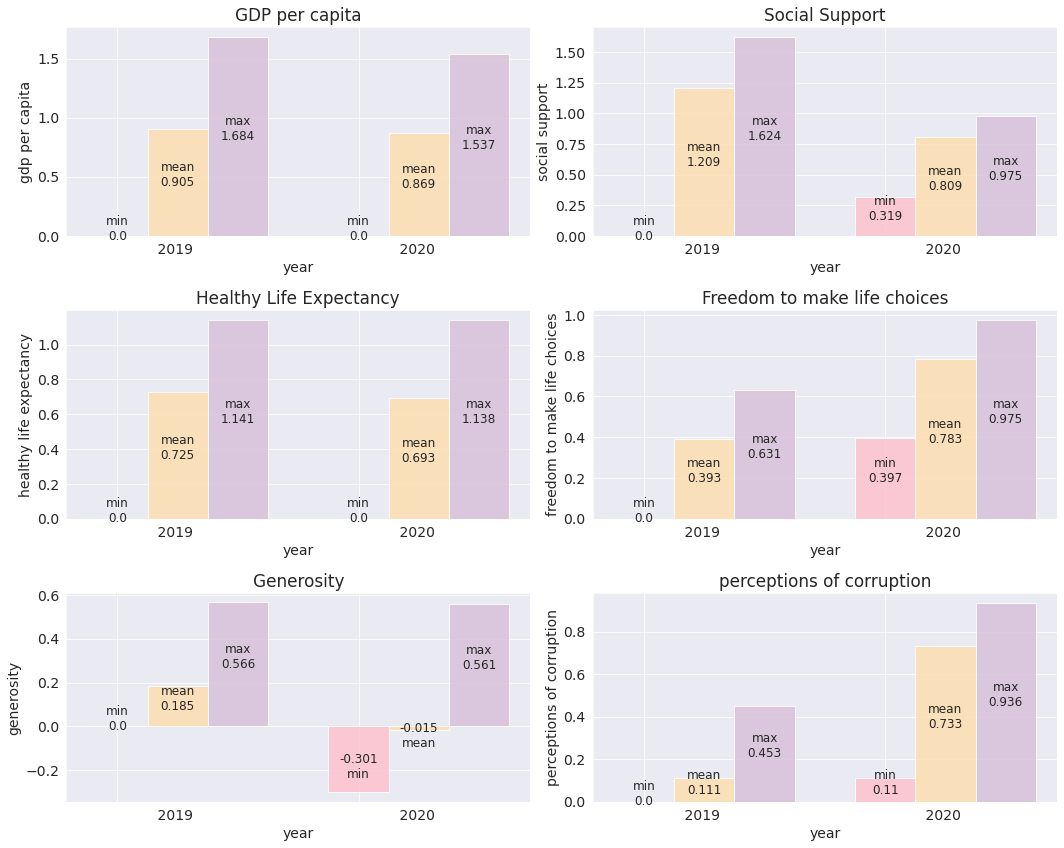

In [125]:
plt.figure(figsize=(15, 12))

# gdp per capita
plt.subplot(3,2,1)
plt.title("GDP per capita")
bar_width = 0.25
plt.xlabel('year')
plt.ylabel('gdp per capita')
plt.xticks(gdp_stats_df['year'], ('         2019', '         2020'), ha='left')
gdp_max_bar = plt.bar(gdp_stats_df['year'] + bar_width + bar_width, gdp_stats_df['max'], bar_width, align='center', alpha=0.8, color="thistle");
gdp_mean_bar = plt.bar(gdp_stats_df['year'] + bar_width, gdp_stats_df['mean'], bar_width, align='center', alpha=0.8, color="navajowhite");
gdp_min_bar = plt.bar(gdp_stats_df['year'], gdp_stats_df['min'], bar_width, align='center', alpha=0.8, color="pink");

plt.bar_label(gdp_max_bar, ['max', 'max'], label_type='center', fontsize=12, padding=15);
plt.bar_label(gdp_max_bar, gdp_stats_df['max'], label_type='center', fontsize=12, padding=0);
plt.bar_label(gdp_mean_bar, ['mean', 'mean'], label_type='center', fontsize=12, padding=15);
plt.bar_label(gdp_mean_bar, gdp_stats_df['mean'], label_type='center', fontsize=12, padding=0);
plt.bar_label(gdp_min_bar, ['min', 'min'], label_type='center', fontsize=12, padding=15);
plt.bar_label(gdp_min_bar, gdp_stats_df['min'], label_type='center', fontsize=12, padding=0);

# social support
plt.subplot(3,2,2)
plt.title("Social Support")
bar_width = 0.25
plt.xlabel('year')
plt.ylabel('social support')
plt.xticks(soc_stats_df['year'], ('         2019', '         2020'), ha='left')
soc_max_bar = plt.bar(soc_stats_df['year'] + bar_width + bar_width, soc_stats_df['max'], bar_width, align='center', alpha=0.8, color="thistle");
soc_mean_bar = plt.bar(soc_stats_df['year'] + bar_width, soc_stats_df['mean'], bar_width, align='center', alpha=0.8, color="navajowhite");
soc_min_bar = plt.bar(soc_stats_df['year'], soc_stats_df['min'], bar_width, align='center', alpha=0.8, color="pink");

plt.bar_label(soc_max_bar, ['max', 'max'], label_type='center', fontsize=12, padding=15);
plt.bar_label(soc_max_bar, soc_stats_df['max'], label_type='center', fontsize=12, padding=0);
plt.bar_label(soc_mean_bar, ['mean', 'mean'], label_type='center', fontsize=12, padding=15);
plt.bar_label(soc_mean_bar, soc_stats_df['mean'], label_type='center', fontsize=12, padding=0);
plt.bar_label(soc_min_bar, ['min', 'min'], label_type='center', fontsize=12, padding=15);
plt.bar_label(soc_min_bar, soc_stats_df['min'], label_type='center', fontsize=12, padding=0);

# healthy life expectancy
plt.subplot(3,2,3)
plt.title("Healthy Life Expectancy")
bar_width = 0.25
plt.xlabel('year')
plt.ylabel('healthy life expectancy')
plt.xticks(life_stats_df['year'], ('         2019', '         2020'), ha='left')
life_max_bar = plt.bar(life_stats_df['year'] + bar_width + bar_width, life_stats_df['max'], bar_width, align='center', alpha=0.8, color="thistle");
life_mean_bar = plt.bar(life_stats_df['year'] + bar_width, life_stats_df['mean'], bar_width, align='center', alpha=0.8, color="navajowhite");
life_min_bar = plt.bar(life_stats_df['year'], life_stats_df['min'], bar_width, align='center', alpha=0.8, color="pink");

plt.bar_label(life_max_bar, ['max', 'max'], label_type='center', fontsize=12, padding=15);
plt.bar_label(life_max_bar, life_stats_df['max'], label_type='center', fontsize=12, padding=0);
plt.bar_label(life_mean_bar, ['mean', 'mean'], label_type='center', fontsize=12, padding=15);
plt.bar_label(life_mean_bar, life_stats_df['mean'], label_type='center', fontsize=12, padding=0);
plt.bar_label(life_min_bar, ['min', 'min'], label_type='center', fontsize=12, padding=15);
plt.bar_label(life_min_bar, life_stats_df['min'], label_type='center', fontsize=12, padding=0);

# freedom to make life choices
plt.subplot(3,2,4)
plt.title("Freedom to make life choices")
bar_width = 0.25
plt.xlabel('year')
plt.ylabel('freedom to make life choices')
plt.xticks(free_stats_df['year'], ('         2019', '         2020'), ha='left')
free_max_bar = plt.bar(free_stats_df['year'] + bar_width + bar_width, free_stats_df['max'], bar_width, align='center', alpha=0.8, color="thistle");
free_mean_bar = plt.bar(free_stats_df['year'] + bar_width, free_stats_df['mean'], bar_width, align='center', alpha=0.8, color="navajowhite");
free_min_bar = plt.bar(free_stats_df['year'], free_stats_df['min'], bar_width, align='center', alpha=0.8, color="pink");

plt.bar_label(free_max_bar, ['max', 'max'], label_type='center', fontsize=12, padding=15);
plt.bar_label(free_max_bar, free_stats_df['max'], label_type='center', fontsize=12, padding=0);
plt.bar_label(free_mean_bar, ['mean', 'mean'], label_type='center', fontsize=12, padding=15);
plt.bar_label(free_mean_bar, free_stats_df['mean'], label_type='center', fontsize=12, padding=0);
plt.bar_label(free_min_bar, ['min', 'min'], label_type='center', fontsize=12, padding=15);
plt.bar_label(free_min_bar, free_stats_df['min'], label_type='center', fontsize=12, padding=0);

# generosity
plt.subplot(3,2,5)
plt.title("Generosity")
bar_width = 0.25
plt.xlabel('year')
plt.ylabel('generosity')
plt.xticks(generosity_stats_df['year'], ('         2019', '         2020'), ha='left')
generosity_max_bar = plt.bar(generosity_stats_df['year'] + bar_width + bar_width, generosity_stats_df['max'], bar_width, align='center', alpha=0.8, color="thistle");
generosity_mean_bar = plt.bar(generosity_stats_df['year'] + bar_width, generosity_stats_df['mean'], bar_width, align='center', alpha=0.8, color="navajowhite");
generosity_min_bar = plt.bar(generosity_stats_df['year'], generosity_stats_df['min'], bar_width, align='center', alpha=0.8, color="pink");

plt.bar_label(generosity_max_bar, ['max', 'max'], label_type='center', fontsize=12, padding=15);
plt.bar_label(generosity_max_bar, generosity_stats_df['max'], label_type='center', fontsize=12, padding=0);
plt.bar_label(generosity_mean_bar, ['mean', 'mean'], label_type='center', fontsize=12, padding=15);
plt.bar_label(generosity_mean_bar, generosity_stats_df['mean'], label_type='center', fontsize=12, padding=0);
plt.bar_label(generosity_min_bar, ['min', 'min'], label_type='center', fontsize=12, padding=15);
plt.bar_label(generosity_min_bar, generosity_stats_df['min'], label_type='center', fontsize=12, padding=0);

# perceptions of corruption
plt.subplot(3,2,6)
plt.title("perceptions of corruption")
bar_width = 0.25
plt.xlabel('year')
plt.ylabel('perceptions of corruption')
plt.xticks(corrupt_stats_df['year'], ('         2019', '         2020'), ha='left')
corrupt_max_bar = plt.bar(corrupt_stats_df['year'] + bar_width + bar_width, corrupt_stats_df['max'], bar_width, align='center', alpha=0.8, color="thistle");
corrupt_mean_bar = plt.bar(corrupt_stats_df['year'] + bar_width, corrupt_stats_df['mean'], bar_width, align='center', alpha=0.8, color="navajowhite");
corrupt_min_bar = plt.bar(corrupt_stats_df['year'], corrupt_stats_df['min'], bar_width, align='center', alpha=0.8, color="pink");

plt.bar_label(corrupt_max_bar, ['max', 'max'], label_type='center', fontsize=12, padding=15);
plt.bar_label(corrupt_max_bar, corrupt_stats_df['max'], label_type='center', fontsize=12, padding=0);
plt.bar_label(corrupt_mean_bar, ['mean', 'mean'], label_type='center', fontsize=12, padding=15);
plt.bar_label(corrupt_mean_bar, corrupt_stats_df['mean'], label_type='center', fontsize=12, padding=0);
plt.bar_label(corrupt_min_bar, ['min', 'min'], label_type='center', fontsize=12, padding=15);
plt.bar_label(corrupt_min_bar, corrupt_stats_df['min'], label_type='center', fontsize=12, padding=0);

plt.tight_layout();

The graph helps us visualize the changes from 2019 to 2020.

- **GDP per capita:** the min remains the same for both years, however the mean and max slightly decreased in 2020.
- **Social support:** the min increased in 2020, however the mean and max decreased significantly in 2020.
- **Healthy life expectancy:** the min remains the same for both years, however the mean and max slightly decreased in 2020.
- **Freedom to make life choices:** the min, mean, and max all increased significantly in 2020.
- **Generosity:** the max remains about the same for both years, however the mean and min significantly decreased in 2020.
- **Perceptions of corruption:** the min, mean, and max all increased significantly in 2020.

Let us save and upload our work to Jovian before continuing.

In [367]:
import jovian

In [368]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ajchen97/world-happiness-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ajchen97/world-happiness-eda


'https://jovian.com/ajchen97/world-happiness-eda'

## Inferences and Conclusion

Based on the analysis, we can assume that the pandemic did not have a huge overall effect on the happiness scores for each country/region. 

However, looking into each individual variable that could've had an effect on the score, we can see that there were some significant changes from 2019 to 2020. 
- Social support had a high positive correlation with the happiness score, and the average social support score went down about 30% from 2019 to 2020. 
- The freedom to make life choices had a moderate positive correlation with the happiness score, and the average freedom score doubled from 2019 to 2020.
- Although generosity is not correlated with the happiness score, we saw the average generosity went down 108% in 2020.
- The perceptions of corruption had a low correlation with the happiness score, that was positive in 2019 and negative in 2020, and the average went up almost 700% in 2020.

We could assume that social support went down significantly in 2020 due to the lockdowns during the pandemic that left people feeling quite isolated or that the perceptions of corruption may have gone up due to the way governments handled the pandemic. We could also assume that generosity went down, due to lack of resources during the pandemic, or that the freedom to make life choices went up because people felt more satisfied with their lives during the pandemic.

In [105]:
import jovian

In [126]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ajchen97/world-happiness-eda" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ajchen97/world-happiness-eda


'https://jovian.com/ajchen97/world-happiness-eda'

## References and Future Work

There is a lot that can be done with the dataset, and these are just some ideas for future projects:
- Compare all the years of the report that are available, rather than just 2019 and 2020. It may give better insights to the changes happening between each year, especially when looking at the scores before and after the pandemic started. 
- Look at the countries that appear in the top or bottom ranks throughout the years and how it has changed over the years.
- Split the countries into specific regions and look at the distributions and statistics based on regions, rather than the individual countries.


References and resources used:
- [Kaggle dataset](https://www.kaggle.com/datasets/mathurinache/world-happiness-report): the dataset used for the analysis
- [World Happiness Report](https://worldhappiness.report/): for explanations on the report and each variable
- [Geeksforgeeks](https://geeksforgeeks.org/): for examples on how to use specific functions
- [StackOverflow](https://stackoverflow.com/): for help on how to do specific things with plots, such as labeling values or formatting plots

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>